<a href="https://colab.research.google.com/github/soumyadipghorai/Timeseries-analysis-dogecoin/blob/main/Dogecoin_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogecoin data Analysis

**Google Colab View Recommended**

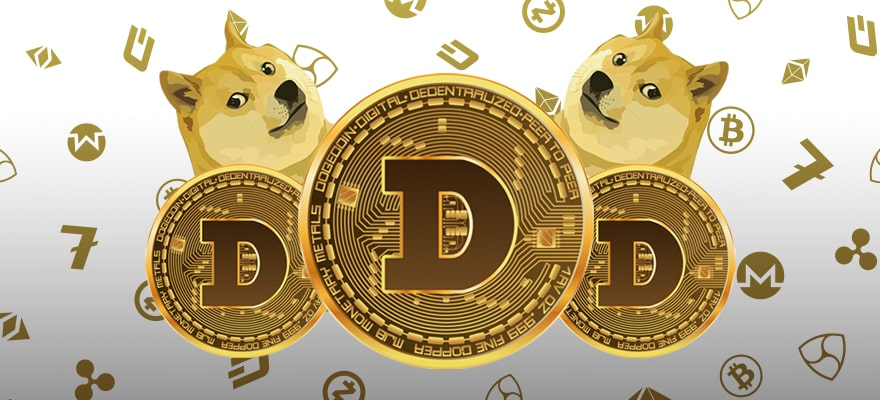

Dogecoin was initially used as a tip on **reddit**. If someone liked someone’s post or comment then they used to tip them with 5 Dogecoins. Initially Dogecoin used to cost around $0.0002.

And slowly it became a popular tipping coin on reddit and made a huge community over there. This community has done a lot of charitable work, two of the big charities are 
* They donated $30000 Dogecoin to Jamaica bobsleigh thus they could participate in the 2014 Russian Winter Olympics which is nearly 22lakh rupees.
* They have donated keniya for its water conservation project and in other special child care funds.

But it started becoming popular in 2019. Seven months prior to that **Elon Musk**, currently the world’s third richest man met Jackson Palmer because of  twitter spam bots who were using his name for various scams. And there Palmer  told Elon about Dogecoin. And after seven months Musk started tweeting about Dogecoin. And then several other celebrities like Snoop Dogg, Jake Paul, Kevin Jonas and others also started tweeting about Dogecoin andDoge started shooting up and now 1 Dogecoin costs around $0.2. 

# Objective of this project 

The tweets of famous people, the price hike of Dogecoin and stories of people becoming millionaires just by investing in Dogecoin are all over the internet. Which is too fascinating for the young generation, and a lot of us want to invest in crypto and get rich quickly. 

So let’s try to find out if this is a safe alternative investment for the young generation using some known statistical methods and observation. 


# Table of contents 


* Import Section
* Data Preparation
* Descriptive Analysis
    * Plot Function
    * Date vs Price
    * Price lies between High and Low
    * Price and Open-Close in the market
    * Candle Stick Plot
    * Trade volumes of different dates
    * Market cap changes
* Linear trend fitting
    * Volume vs Market Cap : Line fitted using ordinary least square method
    * Price vs Quantity treded : line fitted using ordinary least square method
* Moving Average 
    * 7 day moving avg VS 3 day moving avg
    * 30 day moving avg price scatter plot
* Bollinger's Band
* RSI
* Jumps
    * Significant price jump dates
    * Significant price jump dates
* Change Point Analysis
    * 2nd Degree polynomial fitting till the 1st Change Point
    * 5th Degree polynomial fitting in between 1st and 2nd Change Point
    * 2nd Degree polynomial fitting from last change point till Date

* Overall fitting
* Forecasting
* Prediction using ML
* Animation
    * Animation of Volume vs Market Cap vs Price of Popular Alt coins over each quarter
    * Growing Market Cap of Popular Alt coins over each quarter

* Conclusion 

# Reference : 


1. Dataset from [CoinMarketCap](https://coinmarketcap.com/currencies/dogecoin/historical-data/)
2. [Satoshi Nakamoto wikipedia](https://en.wikipedia.org/wiki/Satoshi_Nakamoto)
3. [Why has Satoshi Nakamoto remained anonymous?](https://bravenewcoin.com/insights/why-has-satoshi-nakamoto-remained-anonymous)
4. [Dogecoin wikipedia](https://en.wikipedia.org/wiki/Dogecoin)
5. [Ranking of Dogecoin](https://en.wikipedia.org/wiki/Dogecoin)
6. [Data from Coin Market Cap](https://coinmarketcap.com/currencies/dogecoin/historical-data/), upto 13th July 2021
7. [11 Celebrities Who Have Boosted The Value of The Cryptocurrency Dogecoin](https://www.therichest.com/rich-powerful/celebrities-boost-dogecoin-value/)
8. [Moving average in pandas](https://www.datacamp.com/community/tutorials/moving-averages-in-pandas)
9. [Right Time To Invest In The Stock Market: Bollinger Bands](https://www.linkedin.com/pulse/right-time-invest-stock-market-bollinger-bands-sumit-khedkar/)
10. [Least Square Method](https://byjus.com/maths/least-square-method/)
11. [Introduction to Linear Regression and Polynomial Regression](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)
12. [A Brief Introduction to Change Point Detection using Python](https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/)
14. [Calculate and Analyze RSI Using Python](https://handsoffinvesting.com/calculate-and-analyze-rsi-using-python/)
15. [Stock Market Price Trend Prediction Using Time Series Forecasting](https://www.analyticsvidhya.com/blog/2020/11/stock-market-price-trend-prediction-using-time-series-forecasting/)

# Import Section :
<a class="anchor" id="chapter1"></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import r2_score
import datetime
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# import dataset
df = pd.read_csv('Dogecoin_June.csv')
df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jul 13, 2021",$0.2080000,$0.2081000,$0.1982000,$0.2000000,"$1,035,890,377","$26,085,611,532"
1,"Jul 12, 2021",$0.2160000,$0.2190000,$0.2045000,$0.2080000,"$973,602,708","$27,131,951,860"
2,"Jul 11, 2021",$0.2139000,$0.2187000,$0.2109000,$0.2159000,"$719,870,047","$28,147,268,916"
3,"Jul 10, 2021",$0.2198000,$0.2277000,$0.2107000,$0.2139000,"$1,264,519,098","$27,891,519,500"
4,"Jul 09, 2021",$0.2071000,$0.2291000,$0.1966000,$0.2199000,"$3,045,790,264","$28,663,595,549"


In [3]:
# function to join 
def join(arr) : 
    ans = ''
    for i in arr : 
        ans += i 
    return ans 

# rename column 
df = df.rename( 
    columns={
            "Open*" : "Open",
            "Close**" : "Close", 
            "Market Cap" : "Market_Cap" 
        }
    )

# cleaning values
for i in range(len(df)) : 
    df.Close[i] = df.Close[i][1:]
    df.Volume[i] = df.Volume[i][1:]
    df.Market_Cap[i] = df.Market_Cap[i][1:]
    if df.High[i][0] == "$" : 
        df.High[i] = df.High[i][1:]
    if df.Open[i][0] == "$" : 
        df.Open[i] = df.Open[i][1:]
    if df.Low[i][0] == "$" : 
        df.Low[i] = df.Low[i][1:]
    volume_series = df.Volume.str.split(',')    
    Market_Cap_series = df.Market_Cap.str.split(',')
    df.Volume[i] = join(volume_series[i])
    df.Market_Cap[i] = join(Market_Cap_series[i])

# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2768 non-null   object
 1   Open        2768 non-null   object
 2   High        2768 non-null   object
 3   Low         2768 non-null   object
 4   Close       2768 non-null   object
 5   Volume      2768 non-null   object
 6   Market_Cap  2768 non-null   object
dtypes: object(7)
memory usage: 151.5+ KB


# Data Preparation

Firstly I have collected the data from the website called Coinmarketcap. The dataset has price value in dollars with 2739 rows viz data at 2739 different time points and columns viz: 

* Date : Data of a specific date 
* Open : Price at the beginning of the day
* High : Highest price of the day
* Low : Lowest price of the day
* Close : last price of the day 
* Volume : Volume of Dogecoin traded 
* Market Cap  : Market capital of Dogecoin on that day 


In [4]:
# fixing data type 
df.Date = pd.to_datetime(df.Date)
df.Open = df.Open.astype(float)
df.High = df.High.astype(float)
df.Low = df.Low.astype(float)
df.Close = df.Close.astype(float)
df.Volume = df.Volume.astype(int)
df.Market_Cap = df.Market_Cap.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2768 non-null   datetime64[ns]
 1   Open        2768 non-null   float64       
 2   High        2768 non-null   float64       
 3   Low         2768 non-null   float64       
 4   Close       2768 non-null   float64       
 5   Volume      2768 non-null   int64         
 6   Market_Cap  2768 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 151.5 KB


For the purpose of this project I have changed the names of a few columns and changed their data types. Along with that I added a few more new columns like : 

* Price : Mid price between High and Low 
* Market Mode : If the closing price of a specific day is higher than the opening price then we say the mode is positive else the mode is negative.
* Market change : Percentage change between opening price and closing price 
* Jump : Percentage change between high and low.
* Quantity : Volume / price 

In [5]:
# addign new col 
market_mode, market_change, jump, price, quantity = [], [], [], [], []

for i in range(len(df)) : 
    if df.Open[i] < df.Close[i] : 
        market_mode.append("positive")
    else : 
        market_mode.append("negative")

    market_change_val = ((df.Close[i] - df.Open[i])/df.Open[i])*100
    market_change.append('%.2f'%market_change_val)

    jump_val = ((df.High[i] - df.Low[i])/df.Low[i])*100
    jump.append('%.2f'%jump_val)

    price_val = (df.High[i] + df.Low[i])/2
    price.append(price_val)

df["Price"] = price
df["market_mode"] = market_mode
df["market_change(%)"] = market_change
df["jump(%)"] = jump

for i in range(len(df)) : 
    quantity_val = int(df.Volume[i]/df.Price[i])
    quantity.append(quantity_val)

df["Quantity"] = quantity

df["market_change(%)"] = df["market_change(%)"].astype(float)
df["jump(%)"] = df["jump(%)"].astype(float)
df.Price = df.Price.astype(float)

df

,Date,Open,High,Low,Close,Volume,Market_Cap,Price,market_mode,market_change(%),jump(%),Quantity
0,2021-07-13,0.208000,0.208100,0.198200,0.200000,1035890377,26085611532,0.203150,negative,-3.85,4.99,5099140423
1,2021-07-12,0.216000,0.219000,0.204500,0.208000,973602708,27131951860,0.211750,negative,-3.70,7.09,4597887641
2,2021-07-11,0.213900,0.218700,0.210900,0.215900,719870047,28147268916,0.214800,positive,0.94,3.70,3351350311
3,2021-07-10,0.219800,0.227700,0.210700,0.213900,1264519098,27891519500,0.219200,negative,-2.68,8.07,5768791505
4,2021-07-09,0.207100,0.229100,0.196600,0.219900,3045790264,28663595549,0.212850,positive,6.18,16.53,14309561963
...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2013-12-19,0.000395,0.001520,0.000328,0.001162,0,11150339,0.000924,positive,194.10,362.99,0
2764,2013-12-18,0.000267,0.000362,0.000205,0.000362,0,3188943,0.000283,positive,35.28,76.74,0
2765,2013-12-17,0.000207,0.000289,0.000116,0.000269,0,2169688,0.000202,positive,29.77,149.83,0
2766,2013-12-16,0.000299,0.000866,0.000150,0.000205,0,1509085,0.000508,negative,-31.61,476.50,0


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Market_Cap,Price,market_change(%),jump(%),Quantity
count,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03,2.768000e+03,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,0.014170,0.015462,0.012800,0.014250,4.350618e+08,1.825403e+09,0.014131,0.614628,9.903811,1.427443e+10
std,0.063109,0.069794,0.056052,0.063273,2.803989e+09,8.207099e+09,0.062649,10.749246,18.900848,3.021671e+10
min,0.000087,0.000089,0.000086,0.000087,0.000000e+00,1.509085e+06,0.000087,-50.000000,0.000000,0.000000e+00
25%,0.000227,0.000232,0.000222,0.000226,2.538110e+05,2.338221e+07,0.000227,-2.162500,3.440000,1.095422e+09
50%,0.001853,0.001922,0.001782,0.001855,5.626900e+06,2.140387e+08,0.001854,-0.135000,5.590000,3.160312e+09
75%,0.002908,0.003003,0.002804,0.002909,5.218562e+07,3.504769e+08,0.002912,1.880000,10.392500,1.423122e+10
max,0.690000,0.740000,0.610000,0.680000,6.941068e+10,8.868082e+10,0.675000,301.020000,476.500000,5.874833e+11


In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market_Cap,Price,market_mode,market_change(%),jump(%),Quantity
2763,2013-12-19,0.000395,0.001520,0.000328,0.001162,0,11150339,0.000924,positive,194.10,362.99,0
2764,2013-12-18,0.000267,0.000362,0.000205,0.000362,0,3188943,0.000283,positive,35.28,76.74,0
2765,2013-12-17,0.000207,0.000289,0.000116,0.000269,0,2169688,0.000202,positive,29.77,149.83,0
2766,2013-12-16,0.000299,0.000866,0.000150,0.000205,0,1509085,0.000508,negative,-31.61,476.50,0
2767,2013-12-15,0.000559,0.000904,0.000290,0.000298,0,1960300,0.000597,negative,-46.69,212.12,0


# Descriptive Analysis

## Plot Function 

In [8]:
# plot update function
def update_layout(title, xaxis_title, yaxis_title, legend_title = None, xgrid = False, ygrid = True) : 

    fig.update_layout(
        title={
                'text' : title,
                'y':0.95,
                'x':0.5
            },
        font_family="Palatino",
        title_font_family="Times New Roman",
        title_font_color="#2e2c61",    
        title_font_size = 22,       
        xaxis_title= xaxis_title,
        yaxis_title= yaxis_title,
        font_color="#262424",
        paper_bgcolor='white',
        plot_bgcolor='white',
        )

    try : 
        fig.update_layout(
            legend_title = legend_title,
            legend_title_font_color="green"
        )
    except : 
        pass
    if xgrid == True : 
        if ygrid == False :
            fig.update_xaxes(showline=True, linewidth=2, 
                            linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")
        else : 
            fig.update_xaxes(showline=True, linewidth=2,
                            linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")
            fig.update_yaxes(showline=True, linewidth=2,
                            linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")
    else : 
        fig.update_xaxes(showline=True, linewidth=2,
                        linecolor='#626969', showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2,
                        linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")

    fig.show()

## Date vs Price

In [9]:
fig = px.line(df, x = "Date", y ="Price")
update_layout("Date vs Price", "Date", "Price", True)

## Date vs Price scatter plot

If you look closely the prices started going up during January and February of 2021. During that time Some famous people like Elon Musk, Snoop Dogg tweeted memes related to Doge which hyped up the whole market and the price started going up.

In [10]:
fig = px.scatter(df, x = "Date", y = "Price")
update_layout("Date vs Price scatter plot", "Date", "Price")

This is better understandable in the following plots where you can clearly see the trading volume drastically increased during that time period, so did the market cap of Doge

## Price lies between High and Low

We have taken the price to be the mid value of high and low 

In [11]:
dff = df.head(365)

fig = go.Figure(data=[go.Scatter( 
            x = dff.Date, 
            y = dff["Price"],
            name = "Price"),            
                           go.Scatter( 
            x = dff.Date, 
            y = dff["High"],
            name = 'High'),

            go.Scatter( 
            x = dff.Date, 
            y = dff["Low"],
            name = "Low")
        ]);
update_layout("Price lies between High and Low", "Date", "Price")

## Price and Open-Close in the market

So by the high and low price you can't get an idea about the open and close price. But from the open and close price plot you can see some blue spikes which clearly represents a market crash on that particular day.

In [12]:
dff = df.head(365)

fig = go.Figure(data=[go.Scatter( 
            x = dff.Date, 
            y = dff["Price"],
            name = "Price"),           
    
            go.Scatter(
            x = dff.Date, 
            y = dff["Open"],
            name = 'Open'),

            go.Scatter( 
            x = dff.Date, 
            y = dff["Close"],
            name = "close")
        ]);

update_layout("Price and Open-Close in the market", "Date", "Price")

## Candle Stick Plot 

To capture the whole information we use candlestick plots where you can find Open Close High Low Price everything at one place

In [13]:
dff = df.head(100)

fig = go.Figure(data=[go.Candlestick(x=dff['Date'],
                open=dff['Open'],
                high=dff['High'],
                low=dff['Low'],
                close=dff['Close'],
                name = "Boxplot"),
                
                go.Scatter(x=dff['Date'],
                y = df.Close, 
                name = "Price",
                marker_color = "blue")
                ])

fig.update_layout(
        shapes = [dict(
            x0='2021-04-12', x1='2021-04-12', y0=0, y1=1,
            line_width=2, line_color = '#1fed18')],
        annotations=[dict(
            x='2021-04-12', y=0.05, 
            showarrow=False, xanchor='left', text='Increase Period Begins')]
    )

fig.update_layout(xaxis_rangeslider_visible=False)

update_layout("Candle stick plot of the last 100 days ", "Date", "Price($)")

## Trade volumes of different dates

Here you can clearly the times when people bought the most dogecoins 

In [14]:
fig = px.line(df, x = "Date", y ="Volume")
update_layout("Trade volumes of different dates", "Date", "Volume ($)")

## Market cap changes

In [15]:
fig = px.line(df, x = "Date", y ="Market_Cap")
update_layout("Market cap changes", "Date", "Market cap ($)")

# Linear trend fitting 

## Volume vs Market Cap : Line fitted using ordinary least square method

This linear trend clearly shows that as the market cap increased more and more new investors dived into the money making pool (Dogecoin) to get benefitted by the rising price.

In [16]:
fig = px.scatter(df, x ="Volume", y = "Market_Cap", trendline="ols");
update_layout("Volume vs Market Cap : Line fitted using ordinary least square method", "Volume($)", "Market Cap($)")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Price vs Quantity treded : line fitted using ordinary least square method
Here we can see that there is not much difference in quantity threaded between the days which marked a positive closing and the days marked negative closing. This shows people blindly believed the hype of Doge. 


In [17]:
fig = px.scatter(df, x ="Price", y = "Quantity", color= "market_mode", trendline="ols");
update_layout("Price vs Quantity treded : line fitted using ordinary least square method", "Price($)", "Quantity")
# when the market mode is positive --> more vol is traded 
# when the market mode is negative --> less vol is traded 

# Moving Average :

In [18]:
# A moving average, also called a rolling or running average, is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean.
moving3 = df.Price.rolling(window= 3).mean()
moving7 = df.Price.rolling(window= 7).mean()
moving30 = df.Price.rolling(window= 30).mean()

moving_df = pd.DataFrame(moving3)
moving_df = moving_df.rename( columns = {
    "Price" : "3day"
})
moving_df["7day"] = moving7
moving_df["30day"] = moving30
moving_df["Date"] = df.Date
moving_df["Price"] = df.Price
moving_df.dropna(inplace = True)
moving_df

,3day,7day,30day,Date,Price
29,0.284067,0.288586,0.246338,2021-06-14,0.215000
30,0.286250,0.295286,0.250233,2021-06-13,0.320000
31,0.281667,0.297857,0.253508,2021-06-12,0.310000
32,0.316667,0.301550,0.257015,2021-06-11,0.320000
33,0.320000,0.304600,0.260708,2021-06-10,0.330000
...,...,...,...,...,...
2763,0.000785,0.000632,0.000434,2013-12-19,0.000924
2764,0.000703,0.000583,0.000430,2013-12-18,0.000283
2765,0.000470,0.000515,0.000423,2013-12-17,0.000202
2766,0.000331,0.000534,0.000427,2013-12-16,0.000508


## 7 day moving avg VS 3 day moving avg
The 3day moving average  and 7day moving average almost follow the price day by day.


In [19]:
moving_df = moving_df.head(150)
fig = go.Figure(data=[go.Scatter( 
            x = moving_df.Date, 
            y = moving_df["7day"],
            name = "7day moving avg"),           
    
            go.Scatter(
            x = moving_df.Date, 
            y = moving_df['3day'],
            name = '3day moving avg'),

            go.Scatter(
            x = moving_df.Date, 
            y = moving_df['Price'],
            name = 'Actual Price')
        ]);
update_layout("7 day moving avg VS 3 day moving avg ", "Date", "Price")

## 30 day moving avg price scatter plot
But the 30 day moving average clearly catches the trend of the price, during the month of march 2021, the price skyrocketed. 

In [20]:
fig = px.line(moving_df.head(1000), x = "Date", y = "30day")
update_layout("30 day moving avg price scatter plot", "Date", "Price")

# Bollinger's Band 

Bollinger Bands are a trading tool used to determine entry and exit points for a trade. If the price goes up the upper bound you buy and when the price goes below the lower bound you sell. 

During 2021 the band is wide which shows the increase in volatility, but as the time increases, the hype settles down and the volatility decreases. 


In [21]:
# bollingerbands
# The gap between lower and upper band represents the market volatility

bollingerbands_df = df.head(100)

bollingerbands_df.index = bollingerbands_df['Date']

windowSize = 5 # good 

stdDeviation = 2.5

# Moving_avg_n, Standard_deviation_n, Upper_band, Lower_band = [], [], [], []
# for i in range(len(bollingerbands_df)) : 
#     Moving_avg_n.append(bollingerbands_df['Close'][i].rolling(window=windowSize).mean())
#     Standard_deviation_n.append(bollingerbands_df['Close'][input].rolling(window=windowSize).std())

# bollingerbands_df['Moving_avg_n'] = Moving_avg_n
# bollingerbands_df['Standard_deviation_n'] = Standard_deviation_n

# for i in range(len(bollingerbands_df)) : 
#     Upper_band.append(bollingerbands_df['Moving_avg_n'][i] + (bollingerbands_df['Standard_deviation_n'][i] * stdDeviation))
#     Lower_band.append(bollingerbands_df['Moving_avg_n'][i] - (bollingerbands_df['Standard_deviation_n'][i] * stdDeviation))
    
# bollingerbands_df['Upper_band'] = Upper_band
# bollingerbands_df['Lower_band'] = Lower_band

# bollingerbands_df

bollingerbands_df['Moving_avg_n'] = bollingerbands_df['Close'].rolling(window=windowSize).mean() 

# Calculate moving standard deviation
bollingerbands_df['Standard_deviation_n'] = bollingerbands_df['Close'].rolling(window=windowSize).std()  

# Calculate the upper band
bollingerbands_df['Upper_band'] = bollingerbands_df['Moving_avg_n'] + (bollingerbands_df['Standard_deviation_n'] * stdDeviation) 

# Calculate the lower band
bollingerbands_df['Lower_band'] = bollingerbands_df['Moving_avg_n'] - (bollingerbands_df['Standard_deviation_n'] * stdDeviation) 


bollingerbands_df = bollingerbands_df[['Close','Upper_band','Lower_band']]


fig = go.Figure(data=[go.Scatter( 
            x = bollingerbands_df.index, 
            y = bollingerbands_df["Close"],
            name = "Close"),            
                           go.Scatter( 
            x = bollingerbands_df.index, 
            y = bollingerbands_df["Lower_band"],
            name = 'Lower Band'),

            go.Scatter( 
            x = bollingerbands_df.index, 
            y = bollingerbands_df["Upper_band"],
            name = "Upper Band")
        ]);

update_layout("Bollinger Bands ", "Date", "Price($)")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

# RSI

The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.

We consider an asset (stock/crypto) is overbought if it crosses the 70% mark (>70%) and underbought if it crosses 30% mark (<30%). 

Here we can see a lot of such movements in Dogecoin. But during april 2021 we can clearly spot a big pump and dump, which is a big negative for any asset.


In [22]:
data = df.head(730)
# Window length for moving average
window_length = 14

close = data['Close']
# Get the difference in price from previous step
delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.clip(lower=0), delta.clip(upper=0)

# Calculate the EWMA (Exponentially Weighted Moving Average)
roll_up1 = up.ewm(span=window_length).mean()
roll_down1 = down.abs().ewm(span=window_length).mean()

# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

# Calculate the SMA (Simple Moving Average)
roll_up2 = up.rolling(window_length).mean()
roll_down2 = down.abs().rolling(window_length).mean()

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

RSI1_df = pd.DataFrame(RSI1)
RSI2_df = pd.DataFrame(RSI2)
RSI1_df["Date"] = df.Date
RSI2_df["Date"] = df.Date

fig = go.Figure(data=[go.Scatter( 
            x = RSI1_df.Date, 
            y = RSI1_df["Close"],
            name = "EWMA"),            
                           go.Scatter( 
            x = RSI2_df.Date, 
            y = RSI2_df["Close"],
            name = 'SMA')
        ]);

update_layout("RSI via EWMA vs RSI via SMA", "Date", "Percentage(%)")

# Jumps 

In [23]:
count, total_count, jump_date = 0, 0, {}

for i in range(len(df.head(150))) : 
    jump = int(((df.Price[i]-df.Price[i+1])/df.Price[i+1])*100)
    if jump>= 20 : 
        count += 1 
print("total",count, "jumps in 2021")

for i in range(len(df)-1) : 
    jump = int(((df.Price[i]-df.Price[i+1])/df.Price[i+1])*100)
    if jump>= 20 : 
        total_count += 1 
        jump_date[df.Date[i]] = jump
print("total",total_count, "jumps in 8 years")

jump_df = pd.DataFrame.from_dict(jump_date, orient = "index", columns = ["jump_amount"])
jump_df

total 11 jumps in 2021
total 56 jumps in 8 years


,jump_amount
2021-06-15,50
2021-05-05,20
2021-05-04,23
2021-04-24,20
2021-04-19,23
2021-04-16,100
2021-04-15,34
2021-04-14,35
2021-04-13,21
2021-04-01,20


## Significant price jump dates

Among the significant jumps most of them took place in 2021 itself and a few in 2014 and 2018. 



In [24]:
fig = px.scatter(jump_df, x = jump_df.index, y = "jump_amount")
update_layout("Significant price jump dates", "Date", "Jump (%)")

In [25]:
jumpDict = {}

for i in range(len(df)-1) : 
    jump = int(((df.Price[i]-df.Price[i+1])/df.Price[i+1])*100)
    if jump not in jumpDict.keys() : 
        jumpDict[jump] = 1
    else :
        jumpDict[jump] += 1


TotalJump = pd.DataFrame.from_dict(jumpDict, orient = "index", columns = ["jump_count"])
TotalJump

,jump_count
-4,93
-1,326
-2,167
2,139
0,915
...,...
-26,1
-41,1
226,1
40,1


## Significant price jump dates

From this histogram we can see that most of the jumps are in the range -35% to +30%. More than 100% jump in a day is very rare.

In [26]:
fig = px.histogram(TotalJump, x = TotalJump.index, y = "jump_count", nbins = 15)
update_layout("Significant price jump dates","Jump (%)", "count")

# Change Point Analysis

Now we try to find the change points in the year 2021. By applying the algorithm mentioned in Change point finding 1.1 we could find three change points in 2021. Viz.

* 14-04-2021
* 08-05-2021
* 20-06-2021

As there is not much data point available ahead of 20-06-2021 so we drop this and consider the 1st two change points as our focus of interest. Now proceed to fit a polynomial between the change points 


In [27]:
change_point = []
data = df.head(100)
positive_change, negative_change = 0, 0
for i in reversed(range(2,len(data))) :
    day1, day2, day3 = data.Price[i], data.Price[i-1], data.Price[i-2]
    diff1, diff2 = int(((day1-day2)/day1)*100), int(((day2-day3)/day2)*100)
    if (diff1 >= 15 and diff2 >= 10) : 
        change_point.append(i)
    elif (diff1 <= -25 and diff2 <= -35) : 
        change_point.append(i)

print("the break points are : ")
for i in change_point : 
    print(data.Date[i])

the break points are : 
2021-04-14 00:00:00
2021-05-08 00:00:00
2021-06-20 00:00:00


## 2nd Degree polynomial fitting till the 1st Change Point
We fitted a second degree polynomial upto 14-04-2021 and it shows an upward trend.

In [28]:
dummy_df = df[change_point[0]:-2500].set_index(pd.Index(i for i in range(len(df[change_point[0]:-2500]))))
x =np.polyfit(dummy_df.index, dummy_df.Price, 2)
fitting_list = []
for i in range(len(dummy_df)) : 
    val = 0
    for j in range(len(x)) : 
        val += x[j]*pow(i,len(x)-1-j)
    fitting_list.append(val)
dummy_df["fitting"] = fitting_list


r2 = r2_score(dummy_df.Price, dummy_df.fitting)

# R2= 1- SSres / SStot
print("R2 score : ",r2, '\n')

fig = go.Figure(data=[go.Scatter( 
            x = dummy_df.Date, 
            y = dummy_df["Price"],
            name = "Price"),            
                           go.Scatter( 
            x = dummy_df.Date, 
            y = dummy_df["fitting"],
            name = 'fitting')
        ]);

update_layout("2nd Degree polynomial fitting till the 1st Change Point", "Date", "Price($)")

R2 score :  0.8125329023964398 



## 5th Degree polynomial fitting in between 1st and 2nd Change Point

Now we fit a 5th degree polynomial between 14-04-2021 and  08-05-2021. Which again shows an upward trend. 


In [29]:
recent_df = df[change_point[1]:change_point[0]].set_index(pd.Index(i for i in range(len(df[change_point[1]:change_point[0]]))))
x =np.polyfit(recent_df.index, recent_df.Price, 5)
fitting_list = []
for i in range(len(recent_df)) : 
    val = 0
    for j in range(len(x)) : 
        val += x[j]*pow(i,len(x)-1-j)
    fitting_list.append(val)
recent_df["fitting"] = fitting_list

r2 = r2_score(recent_df.Price, recent_df.fitting)

# R2= 1- SSres / SStot
print("R2 score : ",r2, '\n')

fig = go.Figure(data=[go.Scatter( 
            x = recent_df.Date, 
            y = recent_df["Price"],
            name = "Price"),            
                           go.Scatter( 
            x = recent_df.Date, 
            y = recent_df["fitting"],
            name = 'fitting')
        ]);

update_layout("5th Degree polynomial fitting in between 1st and 2nd Change Point", "Date", "Price($)")


R2 score :  0.9613894719220182 



## 2nd Degree polynomial fitting from last change point till Date

Now we proceed to fit a second degree polynomial from 08-05-2021 to the last available data point, which captures the downward movement clearly and the price continues to fall till date (July 21st, 2021).

In [30]:
recent_df = df[:change_point[1]].set_index(pd.Index(i for i in range(len(df[:change_point[1]]))))
x =np.polyfit(recent_df.index, recent_df.Price, 2)
fitting_list = []
for i in range(len(recent_df)) : 
    val = 0
    for j in range(len(x)) : 
        val += x[j]*pow(i,len(x)-1-j)
    fitting_list.append(val)
recent_df["fitting"] = fitting_list

r2 = r2_score(recent_df.Price, recent_df.fitting)

# R2= 1- SSres / SStot
print("R2 score : ",r2, '\n')

fig = go.Figure(data=[go.Scatter( 
            x = recent_df.Date, 
            y = recent_df["Price"],
            name = "Price"),            
                           go.Scatter( 
            x = recent_df.Date, 
            y = recent_df["fitting"],
            name = 'fitting')
        ]);

update_layout("2nd Degree polynomial fitting from last change point till Date", "Date", "Price($)")

R2 score :  0.8221613732262036 



# Overall fitting 


We can see a 2nd degree polynomial captures the overall trend quite well but to forecast using just the polynomial we will need a higher degree polynomial.

In [31]:
overall_df = df[:-2500].set_index(pd.Index(i for i in range(len(df[:-2500]))))
x =np.polyfit(overall_df.index, overall_df.Price, 5)
fitting_list = []
for i in range(len(overall_df)) : 
    val = 0
    for j in range(len(x)) : 
        val += x[j]*pow(i,len(x)-1-j)
    fitting_list.append(val)
overall_df["fitting"] = fitting_list

r2 = r2_score(overall_df.Price, overall_df.fitting)

# R2= 1- SSres / SStot
print("R2 score : ",r2, '\n')

fig = go.Figure(data=[go.Scatter( 
            x = overall_df.Date, 
            y = overall_df["Price"],
            name = "Price"),            
                           go.Scatter( 
            x = overall_df.Date, 
            y = overall_df["fitting"],
            name = 'fitting')
        ]);

update_layout("5th Degree polynomial fitting till the 1st Change Point", "Date", "Price($)")


R2 score :  0.8104462921730498 



# Forecasting

Here we have fitted a 41 degree polynomial which again shows that the price will go down even below. 


In [32]:
# for x_range in range(3,50) : 
forecast_df = df[5:-2550][["Date", "Price"]].set_index(pd.Index(i for i in range(len(df[5:-2550]))))
x =np.polyfit(forecast_df.index, forecast_df.Price, 41)

date = df.Date[0]

fitting_list, forecast_dict, col1, col2, col3= [], {}, [], [], []
for i in range(len(forecast_df)+1) : 
    val = 0
    for j in range(len(x)) : 
        val += x[j]*pow(i,len(x)-1-j)
    if (i< len(forecast_df)) : 
        fitting_list.append(val)
    else : 
        date += datetime.timedelta(days=1)
        col1.append(date)
        col2.append(np.nan)
        col3.append(val)

forecast_df['fitting'] = fitting_list

# Concat with old DataFrame and reset the Index.


forecast_dict["Date"] = col1
forecast_dict["Price"] = col2
forecast_dict["fitting"] = col3

# forecast_dict

forecast_dict_df = pd.DataFrame(forecast_dict)

forecast_df = pd.concat([forecast_dict_df, forecast_df]).reset_index(drop = True)

# forecast_df
# forecast_dict_df

r2 = r2_score(forecast_df.Price[1:], forecast_df.fitting[1:])

print("R2 score : ",r2, '\n')

fig = go.Figure(data=[go.Scatter( 
            x = forecast_df.Date, 
            y = forecast_df["Price"],
            name = "Price"), 
                go.Scatter( 
            x = forecast_df.Date, 
            y = forecast_df["fitting"],
            name = 'Predited')
        ]);

update_layout("Forecast using higher degree polynomial", "Date", "Price($)")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning:

Polyfit may be poorly conditioned



R2 score :  0.9486455180196551 



# Prediction using ML 

In [33]:
df.head()

,Date,Open,High,Low,Close,Volume,Market_Cap,Price,market_mode,market_change(%),jump(%),Quantity
0,2021-07-13,0.2080,0.2081,0.1982,0.2000,1035890377,26085611532,0.20315,negative,-3.85,4.99,5099140423
1,2021-07-12,0.2160,0.2190,0.2045,0.2080,973602708,27131951860,0.21175,negative,-3.70,7.09,4597887641
2,2021-07-11,0.2139,0.2187,0.2109,0.2159,719870047,28147268916,0.21480,positive,0.94,3.70,3351350311
3,2021-07-10,0.2198,0.2277,0.2107,0.2139,1264519098,27891519500,0.21920,negative,-2.68,8.07,5768791505
4,2021-07-09,0.2071,0.2291,0.1966,0.2199,3045790264,28663595549,0.21285,positive,6.18,16.53,14309561963


Here we have taken price from the last 300 days 

In [34]:
y = df.head(300).iloc[:,7].values
y = y.reshape(-1, 1)
y

array([[0.20315  ],
       [0.21175  ],
       [0.2148   ],
       [0.2192   ],
       [0.21285  ],
       [0.21395  ],
       [0.23025  ],
       [0.23585  ],
       [0.2371   ],
       [0.248    ],
       [0.24635  ],
       [0.2434   ],
       [0.2494   ],
       [0.2509   ],
       [0.26395  ],
       [0.2589   ],
       [0.2539   ],
       [0.24305  ],
       [0.25955  ],
       [0.2456   ],
       [0.21405  ],
       [0.1904   ],
       [0.2237   ],
       [0.2731   ],
       [0.292    ],
       [0.29415  ],
       [0.30865  ],
       [0.31345  ],
       [0.32375  ],
       [0.215    ],
       [0.32     ],
       [0.31     ],
       [0.32     ],
       [0.33     ],
       [0.33     ],
       [0.32     ],
       [0.355    ],
       [0.375    ],
       [0.375    ],
       [0.375    ],
       [0.41     ],
       [0.395    ],
       [0.345    ],
       [0.31     ],
       [0.3      ],
       [0.3      ],
       [0.325    ],
       [0.34     ],
       [0.355    ],
       [0.35     ],


In [35]:
x = [i for i in reversed(range(300))]
x = np.array(x).reshape(-1, 1)
x

array([[299],
       [298],
       [297],
       [296],
       [295],
       [294],
       [293],
       [292],
       [291],
       [290],
       [289],
       [288],
       [287],
       [286],
       [285],
       [284],
       [283],
       [282],
       [281],
       [280],
       [279],
       [278],
       [277],
       [276],
       [275],
       [274],
       [273],
       [272],
       [271],
       [270],
       [269],
       [268],
       [267],
       [266],
       [265],
       [264],
       [263],
       [262],
       [261],
       [260],
       [259],
       [258],
       [257],
       [256],
       [255],
       [254],
       [253],
       [252],
       [251],
       [250],
       [249],
       [248],
       [247],
       [246],
       [245],
       [244],
       [243],
       [242],
       [241],
       [240],
       [239],
       [238],
       [237],
       [236],
       [235],
       [234],
       [233],
       [232],
       [231],
       [230],
       [229],
      

We have seen that the 5th degree polynomial captures the trend well so we will use the polynomial of degree 5 here 

In [36]:
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

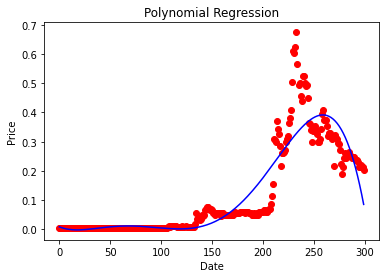

In [52]:
plt.scatter(x, y, color = 'red');
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue');
plt.title('Polynomial Regression');
plt.xlabel('Date');
plt.ylabel('Price');
plt.show()

Predicting the next date price 

In [38]:
lin_reg_2.predict(poly_reg.fit_transform([[300]]))

array([[0.06637181]])

# Animation

In [39]:
def clean_df(name, coin_name) : 
    name = name.rename( 
    columns={
            "Open*" : "Open",
            "Close**" : "Close", 
            "Market Cap" : "Market_Cap" 
        }
    )

    # cleaning values
    name_arr = []
    for i in range(len(name)) :
        dateArr = name.Date[i].split(' ') # split the date into 3 parts 

        if (dateArr[0] == 'Mar') and (dateArr[1] == '15,'):  
            name.Date[i] = dateArr[2] + '.1' # we consider 4 quarters --> if the date is 15 we keep
        elif (dateArr[0] == 'Jun') and (dateArr[1] == '15,') :   
            name.Date[i] = dateArr[2] + '.2'
        elif (dateArr[0] == 'Sep') and (dateArr[1] == '15,'):
            name.Date[i] = dateArr[2] + '.3'
        elif (dateArr[0] == 'Dec') and (dateArr[1] == '15,'):   
            name.Date[i] = dateArr[2] + '.4'
        else :
            name.drop(index = i, inplace = True ) # else we drop 

    # proceed cleaning the new df
    for i in name.index : 
        name_arr.append(coin_name)
        name.Close[i] = name.Close[i][1:]
        name.Volume[i] = name.Volume[i][1:]
        name.Market_Cap[i] = name.Market_Cap[i][1:]
        if name.High[i][0] == "$" : 
            name.High[i] = name.High[i][1:]
        if name.Open[i][0] == "$" : 
            name.Open[i] = name.Open[i][1:]
        if name.Low[i][0] == "$" : 
            name.Low[i] = name.Low[i][1:]
        volume_series = name.Volume.str.split(',')    
        Market_Cap_series = name.Market_Cap.str.split(',')
        name.Volume[i] = join(volume_series[i])
        name.Market_Cap[i] = join(Market_Cap_series[i])

        # for some coins the price is more 
        # so we again split by
        try : 
            Close_series = name.Close.str.split(',')    
            name.Close[i] = join(Close_series[i])
            Open_series = name.Open.str.split(',')    
            name.Open[i] = join(Open_series[i])
            High_series = name.High.str.split(',')    
            name.High[i] = join(High_series[i])
            Low_series = name.Low.str.split(',')    
            name.Low[i] = join(Low_series[i])

        # if doesn't work then there is no comma 
        except : 
            pass # so we pass 

    name['name'] = name_arr 
    name.Date = name.Date.astype(float) # we consider the quarter years as float
    name.Open = name.Open.astype(float)
    name.High = name.High.astype(float)
    name.Low = name.Low.astype(float)
    name.Close = name.Close.astype(float)
    name.Volume = name.Volume.astype(int)
    name.Market_Cap = name.Market_Cap.astype(int)

    # now we add the price col
    price = []
    for i in name.index : 
        price_val = (name.High[i] + name.Low[i])/2
        price.append(price_val)

    name['Price'] = price

    return name 

In [40]:
Binance = pd.read_csv("Binance - Sheet1.csv")
Binance = clean_df(Binance, "Binance")
# Binance

In [41]:
Bitcoin = pd.read_csv("Bitcoin - Sheet1.csv")
Bitcoin = clean_df(Bitcoin, "Bitcoin")
# Bitcoin

In [42]:
Cardano = pd.read_csv("Cardano - Sheet1.csv")
Cardano = clean_df(Cardano, "Cardano")

In [43]:
Dogecoin = pd.read_csv("Dogecoin - Sheet1.csv")
Dogecoin = clean_df(Dogecoin, "Dogecoin")

In [44]:
Ethereum = pd.read_csv("Ethereum - Sheet1.csv")
Ethereum = clean_df(Ethereum, "Ethereum")

In [45]:
Litecoin = pd.read_csv("Litecoin - Sheet1.csv")
Litecoin = clean_df(Litecoin, "Litecoin")

In [46]:
# allCoins = Litecoin.append(Ethereum, ignore_index = True)
allCoins = Litecoin
allCoins = allCoins.append(Dogecoin, ignore_index = True)
allCoins = allCoins.append(Cardano, ignore_index = True)
# allCoins = allCoins.append(Bitcoin, ignore_index = True)
allCoins = allCoins.append(Binance, ignore_index = True)
for i in allCoins.index : 
    if allCoins.Date[i] < 2017.3 : 
        allCoins.drop(index = i, inplace= True)
allCoins.sort_values(by = "Date", inplace = True)
allCoins

,Date,Open,High,Low,Close,Volume,Market_Cap,name,Price
89,2017.3,0.680000,0.850000,0.530000,0.800000,4625680,79970900,Binance,0.690000
74,2017.3,0.680000,0.850000,0.530000,0.800000,4625680,79970900,Cardano,0.690000
44,2017.3,0.000852,0.000950,0.000626,0.000865,21413000,96132679,Dogecoin,0.000788
13,2017.3,41.690000,50.650000,32.030000,48.210000,1554339968,2552770743,Litecoin,41.340000
73,2017.4,0.230000,0.230000,0.190000,0.210000,207311008,5534573967,Cardano,0.210000
88,2017.4,3.160000,4.410000,3.140000,4.000000,52745900,395674796,Binance,3.775000
12,2017.4,280.970000,316.410000,251.220000,299.780000,2599940096,16284702205,Litecoin,283.815000
43,2017.4,0.003670,0.003809,0.003483,0.003762,19043800,422678524,Dogecoin,0.003646
11,2018.1,161.200000,167.330000,151.480000,164.480000,564609024,9152161117,Litecoin,159.405000
72,2018.1,0.200000,0.200000,0.170000,0.190000,204232992,4814890343,Cardano,0.185000


In [47]:
print(allCoins.Price.max())
print(allCoins.Price.min())

283.815
0.0007878


In [48]:
print(allCoins.Market_Cap.max())
print(allCoins.Market_Cap.min())

39353447071
79970900


## Animation of Volume vs Market Cap vs Price of Popular Alt coins over each quarter
Here some comparison between other altcoins and Dogecoin. This shows the following facts..
Dogecoin has the smallest market cap now among the other popular altcoins.
Dogecoin is among the cheapest so it's somewhat more popular compared to others  


In [49]:
fig = px.scatter(allCoins, x="Market_Cap", y="Price", animation_frame="Date", size="Volume", color = "name", size_max=55,
           range_x=[50000000, 40000000000], range_y=[0,290])
update_layout("Animation of Volume vs Market Cap vs Price of Popular Alt coins over each quarter", "Market Cap", "Price")

## Growing Market Cap of Popular Alt coins over each quarter

In [50]:
fig = px.bar(allCoins, x="name", y="Market_Cap", color="name", animation_frame="Date", range_y=[10000000, 40000000000])
update_layout("Growing Market Cap of Popular Alt coins over each quarter", "Name", "Market Cap")

# Conclusion 


It's very hard to predict the future price of crypto currencies. Still Bitcoin is kind of stable but for most alt coins there is hardly any trend. One specific trend that you can find in some coins is that in some regular intervals the price goes up like a rocket and then again comes down. It's popularly known as the “Pump and Dump” scheme where some wealthy people put the money and take the price up, book profit and exit.

Still people have made millions out of it. If anyone wants to invest into Dogecoin then 

* The Bollingers band, RSI indicator and the Moving avg can be really helpful. Forecasting the price of such a volatile asset doesn’t make sense.
* This analysis clearly shows what the hype can actually do to a particular asset class, as hype is going down, the price of dogecoin is also going down. So if you are already invested then it might be a red signal for you.
* If you haven’t invented yet then, it's a perfect time to monitor what the creators are about to do, what is the future aspect of doge, and then analyse if you want to get into this or not. 

But before investing you should keep a few things in mind. 
* These crypto currencies don’t exist physically. So the price of the currency depends somewhat on faith. So it's more important to understand the faith rather than the technicalities. So don’t put your money into it just because the price is going up. 
* As there is no gov intervention in any transaction so these cryptos are very popular in criminal transactions and dark web. Everyone needs to understand the dark side of these futuristic technologies too.


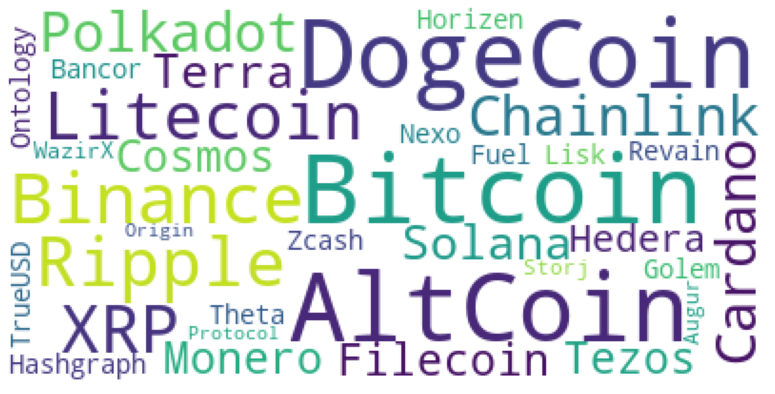

In [51]:
crypto = ["Bitcoin", "AltCoin", "DogeCoin", "Binance", "Ripple", "Litecoin", "XRP", "Chainlink", "Polkadot", "Cardano",
          "Solana", "Terra", "Filecoin", "Monero", "Cosmos", "Tezos", "Hedera Hashgraph", "Theta Fuel", "Zcash", "TrueUSD",
          "Nexo", "Bancor", "Ontology","Horizen", "Revain", "Lisk", "Golem", "WazirX", "Storj","Augur", "Origin Protocol"]
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(crypto))

plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()